## Ejercicios Estadística I

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("files/world_data_full_apply_nulos.csv", index_col=0) 
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

# Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.

1.-Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

In [3]:
df.describe()

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,195.000000,188.000000,165.000000,166.000000,189.000000,194.000000,183.000000,175.000000,179.000000,188.000000,188.000000,175.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,188.000000,39.000000,176.000000,169.000000,183.000000,176.000000,45.000000,194.000000,194.000000
mean,134.504533,39.117553,255.212661,103.783133,20.214974,360.546392,125.915470,144.193600,6.722346,2.698138,32.015426,1.002457,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,333.542718,62.738068,16.573964,40.822404,6.886364,279.461044,19.092351,20.232434
std,157.306774,21.783052,258.385008,167.158031,9.945774,323.236419,181.794917,54.783998,24.450414,1.282267,23.791331,0.368858,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,296.467504,10.502907,6.961632,20.557662,5.079216,283.322352,23.961779,66.716110
min,1.265000,0.600000,0.000000,0.000000,5.900000,1.000000,1.016000,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,10.084000,38.000000,0.000000,8.000000,0.090000,5.464000,-40.900557,-175.198242
25%,26.168500,21.700000,41.277000,10.250000,11.300000,82.500000,7.600000,113.670000,1.000000,1.705000,11.000000,0.755000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,17.450000,0.332500,87.130000,56.150000,11.700000,30.600000,3.395000,40.765000,4.544175,-7.941496
50%,83.000000,39.600000,148.460000,28.500000,17.950000,255.500000,34.477000,124.740000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,215.056000,62.450000,16.300000,37.200000,5.360000,179.039000,17.273849,20.972652
75%,165.500000,55.375000,430.000000,128.250000,28.750000,506.750000,185.030500,155.925000,4.250000,3.597500,48.175000,1.240000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,43.975000,2.935000,556.162500,69.500000,21.100000,48.000000,9.490000,417.765000,40.124603,48.281523
max,847.000000,82.600000,964.000000,936.000000,46.080000,1876.000000,727.973000,550.930000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,973.560000,86.800000,37.200000,219.600000,28.180000,984.812000,64.963051,178.065032


In [10]:
# Otra opcion:

# df.agg(['mean','median','std','min','max'])

#df.groupby("country")[lista_de_columnas].agg(['mean','median','std','min','max'],numeric_only=True).reset_index()

,country,mean,median,std,min,max
0,Afghanistan,60.0,60.0,NaN,60.0,60.0
1,Albania,105.0,105.0,NaN,105.0,105.0
2,Algeria,18.0,18.0,NaN,18.0,18.0
3,Andorra,164.0,164.0,NaN,164.0,164.0
4,Angola,26.0,26.0,NaN,26.0,26.0
...,...,...,...,...,...,...
190,Venezuela,32.0,32.0,NaN,32.0,32.0
191,Vietnam,314.0,314.0,NaN,314.0,314.0
192,Yemen,56.0,56.0,NaN,56.0,56.0
193,Zambia,25.0,25.0,NaN,25.0,25.0


2.-Identifica el país con la mayor densidad de población y el país con la menor densidad de población en el conjunto de datos.

In [43]:
# El método idxmax() en Pandas devuelve el índice del valor máximo en una Serie (columna de un DataFrame).

max_density_country = df["country"][df["population"].idxmax()]
min_density_country = df["country"][df["population"].idxmin()]

max_density = df["population"].max()
min_density = df["population"].min()

print(f"País con mayor densidad: {max_density_country} con una densidad de {max_density}")
print(f"País con menor densidad: {min_density_country} con una densidad de {min_density}")


País con mayor densidad: Djibouti con una densidad de 973.56
País con menor densidad: Nauru con una densidad de 10.084


3.-Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [45]:
promedio_natalidad = df['birth_rate'].mean()
promedio_natalidad

np.float64(20.214973544973546)

4.-Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [46]:
df['mort_inf_cat'] = pd.cut(df['infant_mortality'], bins=3, labels=['baja','moderada','alta'])

In [50]:
df[['mort_inf_cat','infant_mortality']]

,mort_inf_cat,infant_mortality
0,moderada,47.9
1,baja,7.8
2,baja,20.1
3,baja,2.7
4,moderada,51.6
...,...,...
190,baja,21.4
191,baja,16.5
192,moderada,42.9
193,moderada,40.4


5.-Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [51]:
df_correlaciones = df[["fertility_rate","life_expectancy"]].corr( method = "spearman")
df_correlaciones

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.843047
life_expectancy,-0.843047,1.000000


<Axes: xlabel='fertility_rate', ylabel='life_expectancy'>

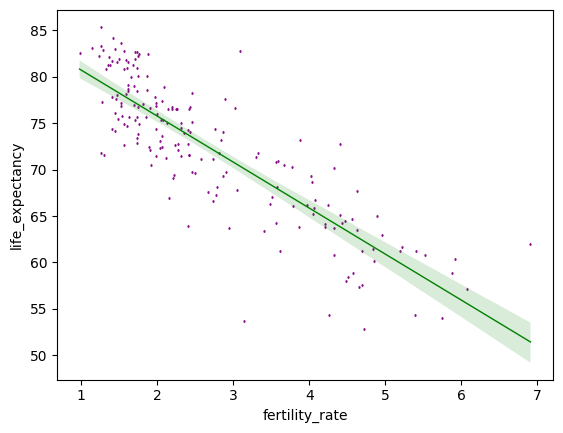

In [52]:
sns.regplot(x = "fertility_rate", y = "life_expectancy", data = df, marker= 'd', scatter_kws={'color': 'purple', 's': 1}, line_kws={'color': 'green', 'linewidth': 1}) 

# A menos tasa de fertilidad, mayor esperanza de vida. Y viceversa.

BONUS:
6.-Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

In [54]:
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,mort_inf_cat
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia,moderada
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe,baja


<Axes: xlabel='cpi', ylabel='Count'>

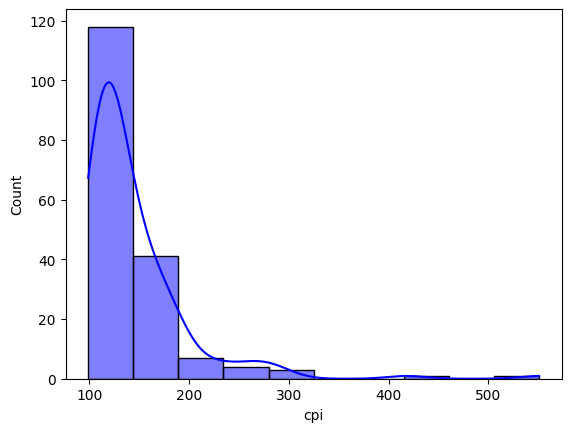

In [59]:
sns.histplot(data=df, x='cpi', bins=10, kde=True, color='blue') 

<Axes: xlabel='cpi', ylabel='continent'>

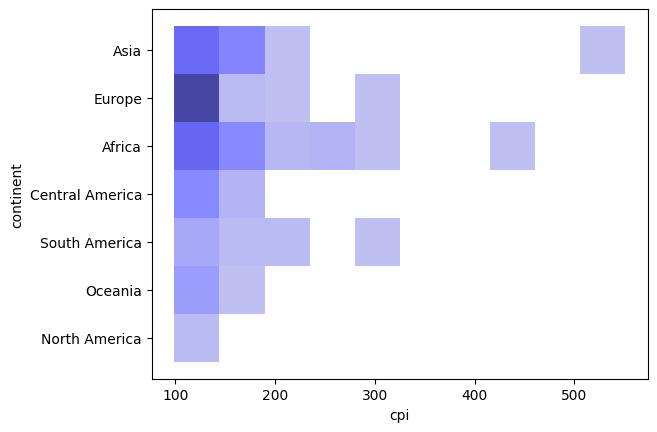

In [58]:
sns.histplot(data=df, x='cpi', y='continent', bins=10, kde=True, color='blue') 

7.- Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [69]:
df['columna_diferencia'] =df['gdp']-df['co2-emissions']

In [72]:
df.loc[df['columna_diferencia'].idxmax()]['country']

'Germany'